In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from itertools import product
%matplotlib inline

## 1. Dynamical Systems

**1.1. Phase diagram:** Consider the dynamical system of a undamped pendulum with no driving force described by the differential equation $y''+\sin (y)= 0$. We can rewrite it as
$$
\begin{cases}
y_1' = y_2\\
y_2'=-\sin (y_1).
\end{cases}
$$
The phase portrait is a plot of a vector field which qualitatively shows how the solutions to these equations will go from a given starting point.
To generate the phase portrait, we need to compute the derivatives $y_1'$ and $y_2'$ at $t=0$ on a grid over the range of values for $y_1$ and $y_2$ we are interested in. Plot the derivatives as a vector at each $(y_1, y_2)\in[-2,8]\times [-3,3]$ which will show us the initial direction from each point (create a grid of $20 \times 20$ points). 

In [2]:
# Use matplotlib.pyplot.quiver to plot a 2D field of arrows.

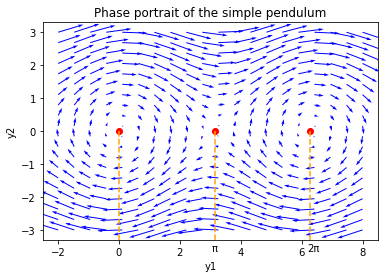

In [3]:
def pendulum_ode(y, t):
    y_1_t, y_2_t = y
    dy1_dt = y_2_t
    dy2_dt = -np.sin(y_1_t)
    dy_dt = (dy1_dt, dy2_dt)
    return dy_dt

y_1 = np.linspace(-2,8,20)
y_2 = np.linspace(-3,3,20)

Y_1, Y_2 = np.meshgrid(y_1,y_2)

U,V = pendulum_ode((Y_1,Y_2),0)

plt.quiver(Y_1,Y_2,U,V,color="b",scale=40)
plt.xlabel("y1")
plt.ylabel("y2")
plt.scatter([0,np.pi,2*np.pi],[0,0,0],color="r")
for i in range(3):
    plt.axvline(i*np.pi,color="#ffa500",linestyle="dashed",ymax=0.5)
plt.text(np.pi-0.1,plt.ylim()[0]-0.35,"π")
plt.text(2*np.pi-0.1,plt.ylim()[0]-0.35,"2π")
_ = plt.title("Phase portrait of the simple pendulum")

**1.2. Trajectories:** The phase diagram shows the trajectories that a dynamical system can take through its phase space. Plot a few solutions on the vector field. Consider the solutions where $y_1(0)=0$, and values of $y_2(0) = [0, 0.5, 1, 1.5, 2, 2.5]$, in other words let the pendulum start at an angle of zero, with various angular velocity.


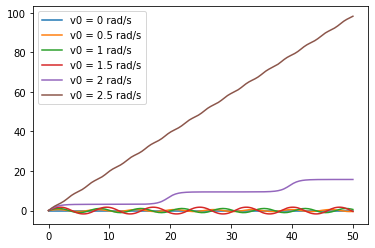

In [4]:
from scipy.integrate import odeint

angular_velocities = [0, 0.5, 1, 1.5, 2, 2.5]

for y20 in angular_velocities:
    tspan = np.linspace(0, 50, 200)
    
    y0 = (0,y20)
    y = odeint(pendulum_ode,y0,tspan)
    plt.plot(tspan,y[:,0], label="v0 = " + str(y20) + " rad/s")
_ = plt.legend()

## 2. Brownian Motion

Consider a the stochastic process of Brownian motion, formally expressed as
$
dX(t) = b(t,X)\cdot dW(t).$

It numeric simulation can be expressed as
$
X[n+1] = X[n] + dX = X[n] + b(t, X[n])\cdot \xi \sqrt{dt} ,
$
where $\xi$ is normally distributed with mean $0$ and variance $1$. 

**2.1.** Simulate and visualize a 2D random walk of your choice, meaning choose function $b(\cdot)$ as you like.

In [37]:
def generate_2D_brownian_walk(dt = 0.001, T = 1.):

    n = int(T / dt)  # Number of time steps.
    t = np.linspace(0., T, n)  # Vector of times.
    sqrt_dt = np.sqrt(dt)
    
    def b(t,X):
        return t**(.25)
    
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    
    x[0], y[0] = (0,0)
    
    for n in range(0,n-1):
        x[n+1] = x[n] + b(t[n],x[n])*np.random.normal()*sqrt_dt
        y[n+1] = y[n] + b(t[n],y[n])*np.random.normal()*sqrt_dt
    
    return x,y

In [38]:
x,y = generate_2D_brownian_walk()

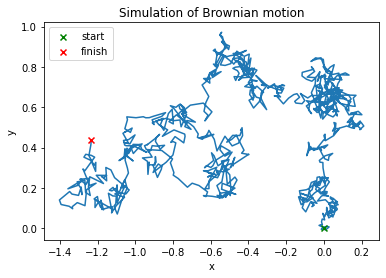

In [39]:
fig = plt.figure()
plt.plot(x,y,zorder=1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Simulation of Brownian motion") 
plt.scatter(0,0,label="start",color="g",marker="x",zorder=2)
plt.scatter(x[-1],y[-1],label="finish",color="r",marker="x",zorder=2)
plt.legend()
plt.show()

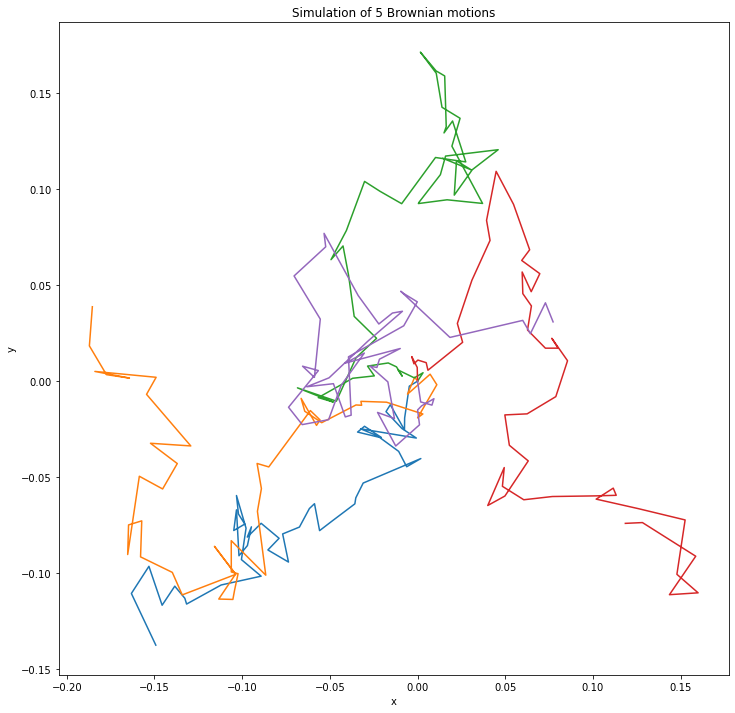

In [42]:
n_trajs = 5

fig = plt.figure(figsize=(12,12))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Simulation of {} Brownian motions".format(n_trajs))

for j in range(n_trajs):
    x,y = generate_2D_brownian_walk(T=0.05)
    plt.plot(x,y)
    
plt.show() 

## 3. Stochastic Differential Equations

A stochastic differential equation (SDE) is a differential equation with at least one stochastic process term. The general form of a SDE is
$$
dX(t) = a(t,X)\cdot dt+b(t,X)\cdot dW(t)
$$
where $a(t, X)$ is a deterministic function known as **drift**, $b(t, X)$ is the **diffusion** coefficient and $dW(t)$ is the stochastic Wiener process (the Brownian motion of Exercise 2). 

The solution can be expressed in the integral form
$$
X(t) = X(0) +\int_0^t a(s,X(s))ds+ \int_0^tb(s,X(s)dW(s),
$$
where the second integral is an *Ito integral*.


### Analytic solution
If we’re lucky, $a$ and $b$ are such that we can solve for $X(t)$ analytically by computing the integrals. For example, in the special case of **Geometric Brownian Motion** where $a(t,x)=\mu x$ and $b(t,x)=\sigma x$, the SDE is

$$
dX(t) = \mu X(t) \cdot dt+\sigma X(t) \cdot dW(t).
$$

The corresponding solution can be expressed explicitly as follows:
$$
X(t) = X(0)\exp\left(
(\mu-\sigma^2/2)t+\sigma W(t)
\right).
$$
A solution to an SDE is itself a stochastic function, meaning that, for any $t$, $X(t)$ is a random variable.

Define a function that simulates $N$ different sample paths for $X(t)$, sample paths differ because of different realizations of the Brownian motion term. 

*Hint:* Discretize a given time interval $[0,T]$ into $n$ points $t_i$ and compute the value of $X$ at each $t_i$. To compute the value of $W$ at those same points, remember that the increments $\Delta W(t_n)=W(t_n)−W(t_{n−1})$ are distributed according to $\sqrt{\Delta t}\cdot\mathcal{N}(0,1)$. The sample path of Brownian motion $W$ can be generated by summing the increments, and compute the exact solution $X$ using the analytical solution above.

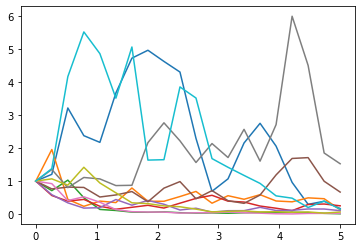

In [61]:
def noise_term_sequence(T,n):
    """
    Computed the values of the stochastic term, from 0 to time T using n discretization points.
    
    Parameters
    ----------
    T : float
        Final time step of the sequence of stochastic terms.
    n : integer
        Number of time steps in the interval [0,T]
    
    Returns
    -------
    out : np.array
        Array representing the n realizations of the stochastic term.
    """
    
    sqrt_dt = np.sqrt(T / n)
    w = np.zeros(n + 1)
    w[0] = 0
    
    for i in range(n):
        w[i+1] = w[i] + np.random.normal() * sqrt_dt
    
    return w[1:]

def simulate_n_gbm(T, discr_points, x0, mu, sigma, n=10):
    """
    Simulates n paths of a Geometric Brownian Motion, from time 0 to time T using 
    a given number of discretization points.
    
    Parameters
    ----------
    T : float
        Final time step of the paths.
    discr_points : integer
        Number of time steps in the interval [0,T]
    x0 : float
        Initial condition of the SDE.
    mu : float
        μ parameter of the SDE.
    sigma : float
        σ parameter of the SDE.
    n : integer
        Number of paths to simulate
    
    Returns
    -------
    out : np.ndarray
        Matrix representing the n paths. Every row is a path, every comlumn a time step.
    """
    
    X = np.zeros((n,discr_points))
    t = np.linspace(0,T,discr_points)
    X[:,0] = x0 * np.ones(n)
    
    for i in range(n):
        w = noise_term_sequence(T,discr_points-1)
        X[i,1:] = x0*np.exp((mu - (sigma**2)/2)*t[1:] + sigma*w)
    
    return X

T = 5
n_points = 20
t = np.linspace(0,T,n_points)

X = simulate_n_gbm(T = T, discr_points = n_points, x0 = 1, mu = 0, sigma = 1)
_ = [plt.plot(t,X[i,:]) for i in range (10)]

- Compute the empirical approximation of the first two moments (mean and variance) over a large number of sample trajecories and **plot the confidence interval** over the trajectory space.

### 3.1 Euler-Maruyana Method (E-M)

The integral form of Geometric Brownian Motion can be written as
$$
X_{n+1}-X_n =  \mu \int_{t_n}^{t_{n+1}} X(s)ds+ \sigma\int_{t_n}^{t_{n+1}}X(s)dW(s).
$$

The simplest approximation to this is the **Euler-Murayama method**, which is the stochastic generalization of the standard Euler method for ODEs:
$$
X_{n+1}-X_n =  \mu  X_n\Delta t_n+ \sigma X_n \Delta W_n.
$$


- Compare the exact solution and the E-M approximation by simulating using two different values of $\Delta t$. Choose the “big  $\Delta t$” values to be exact multiples of the smaller  $\Delta t$ values so that you can evaluate the processes at the same points.

*Comment:* You should observe how the approximation gets “better” (ie. closer) as we reduce the size of our discrete time periods $\Delta t$. 

### 3.2 Milstein method

The **Milstein method** increases the accuracy of the E-M approximation by adding a second-order “correction” term, which is derived from the stochastic Taylor series expansion of $X(t)$ by applying Ito’s lemma to the $a(\cdot)$ and $b(\cdot)$ functions. he Milstein method yields the following differential form
$$
X_{n+1}-X_n = a(X_n)\Delta t + b(X_n)\Delta W_n+\frac{1}{2}b'(X_n)b(X_n)\left( (\Delta W_n)^2-\Delta t\right),
$$
which implies the following for our Geometric Brownian Motion example

$$
X_{n+1}-X_n = \mu X_n \Delta t + \sigma X_n \Delta W_n+\frac{1}{2}\sigma^2 X_n\left( (\Delta W_n)^2-\Delta t\right).
$$

- Simulate a single path using the same draw from the Brownian motion above, and plot it with the exact solution and the E-M approximation. 

*Comment:* Observe how the Milstein approximation looks to be closer than the corresponding E-M approximation. As mentioned above, there are many ways to formally define what we mean when we say that one stochastic process is close to another. We move on to this next.

### 3.3 Convergence

The concept of convergence formalizes what it means for one stochastic process to get closer to another as the discrete time steps $\Delta t$ are reduced. 

**Weak convergence** defines the following error term
$$
e^w(\Delta t) = \sup_{t_n}\mid \mathbb{E}[X(t_n)]-\mathbb{E}[Y(t_n)]\mid.
$$
The weak error term computes the error between the expected values of the two stochastic processes at a given point. So weak convergence captures the average behavior of the simulated approximations.

**Strong convergence** defines the following error term
$$
e^s(\Delta t) = \sup_{t_n}\mathbb{E}[\mid X(t_n) - Y(t_n)\mid].
$$
The strong error is the mean of errors, which captures the difference between the approximation and the exact solution for each individual sample path before the average is taken. Strong convergence is therefore more demanding than weak convergence.

We say that $X(t)$ exhibits strong or weak convergence to $Y(t)$ if the corresponding error tends to zero with $\Delta t$:
$$
\lim_{\Delta t\to 0} e(\Delta t) = 0.
$$


Choosing to require weak or strong convergence depends on the type of closeness we are interested in: “closeness” of the whole trajectory of the solution to the SDE (in which case we care about strong convergence) or in the expected value of some function of the process (which relates to weak convergence). 

- Computes both the weak and the strong convergence errors for the E-M and for the Milstein approximations over a range of decreasing values of $\Delta t$. Simulate $10,000$ sample paths for each value of $\Delta t$. Plot the weak and strong error terms for each approximation against the $\Delta t$ values on log-log axes.

In [13]:
dt_grid = [2 ** (R-10) for R in range(7)]
n_samples = 10000

# Loop over values of dt
for dt in dt_grid:
    
    
    # Generate sample paths
    for i in range(n_samples):
        
        # Create Brownian Motion

        # Exact solution
        
        # Euler-Maruyama
        
        # Milstein
            
        # Compute strong errors and add to those across from other sample paths
        
    # Compute mean of absolute errors and find maximum (strong error)
    
    # Compute error of means and find maximum (weak error)
    

In [8]:
# Plots


- Comment the obtained results.